In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from datetime import datetime

df = pd.read_csv("Untitled discover search.csv", encoding='utf-8')
df.head()

,_id,_index,_score,content,content.keyword,created_at,id,id.keyword,sentiment_score,source,source.keyword,user,user.keyword
0,114469424639906824-2025-05-08 00-40-02+00-00,mastodon-posts,-,#News House GOP infighting threatens Trump’s ‘...,#News House GOP infighting threatens Trump’s ‘...,"May 8, 2025 @ 10:40:02.000",114469424639906824,114469424639906824,0.318,mastodon,mastodon,CNN@c.im,CNN@c.im
1,114469420778939975-2025-05-08 00-39-04+00-00,mastodon-posts,-,"Israeli snipers routinely, deliberately shoot ...","Israeli snipers routinely, deliberately shoot ...","May 8, 2025 @ 10:39:04.000",114469420778939975,114469420778939975,-0.316,mastodon,mastodon,MaxG@theblower.au,MaxG@theblower.au
2,114469412677082671-2025-05-08 00-36-57+00-00,mastodon-posts,-,Discussion of the Anonymous hack of the airlin...,Discussion of the Anonymous hack of the airlin...,"May 8, 2025 @ 10:36:57.000",114469412677082671,114469412677082671,0.000,mastodon,mastodon,tofugolem@mastodon.social,tofugolem@mastodon.social
3,114469385349894941-2025-05-08 00-30-04+00-00,mastodon-posts,-,The # of women in construction grew by 30% fro...,The # of women in construction grew by 30% fro...,"May 8, 2025 @ 10:30:04.000",114469385349894941,114469385349894941,-0.727,mastodon,mastodon,amydiehl@mstdn.social,amydiehl@mstdn.social
4,114469369572027387-2025-05-08 00-26-02+00-00,mastodon-posts,-,Trump's latest deportation scheme is almost ce...,Trump's latest deportation scheme is almost ce...,"May 8, 2025 @ 10:26:02.000",114469369572027387,114469369572027387,-0.299,mastodon,mastodon,memeorandum@universeodon.com,memeorandum@universeodon.com


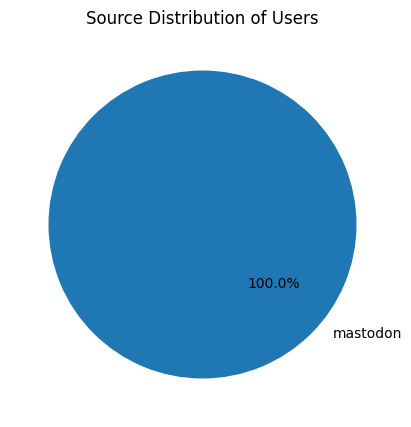

In [ ]:
# Distribution of sources
source_counts = df['source'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Source Distribution of Users')
plt.show()

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%b %d, %Y @ %H:%M:%S.%f')
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')

df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_name()
df['date'] = df['created_at'].dt.date

df.head()

,_id,_index,_score,content,content.keyword,created_at,id,id.keyword,sentiment_score,source,source.keyword,user,user.keyword,hour,day_of_week,date
0,114469424639906824-2025-05-08 00-40-02+00-00,mastodon-posts,-,#News House GOP infighting threatens Trump’s ‘...,#News House GOP infighting threatens Trump’s ‘...,2025-05-08 10:40:02,114469424639906824,114469424639906824,0.318,mastodon,mastodon,CNN@c.im,CNN@c.im,10,Thursday,2025-05-08
1,114469420778939975-2025-05-08 00-39-04+00-00,mastodon-posts,-,"Israeli snipers routinely, deliberately shoot ...","Israeli snipers routinely, deliberately shoot ...",2025-05-08 10:39:04,114469420778939975,114469420778939975,-0.316,mastodon,mastodon,MaxG@theblower.au,MaxG@theblower.au,10,Thursday,2025-05-08
2,114469412677082671-2025-05-08 00-36-57+00-00,mastodon-posts,-,Discussion of the Anonymous hack of the airlin...,Discussion of the Anonymous hack of the airlin...,2025-05-08 10:36:57,114469412677082671,114469412677082671,0.000,mastodon,mastodon,tofugolem@mastodon.social,tofugolem@mastodon.social,10,Thursday,2025-05-08
3,114469385349894941-2025-05-08 00-30-04+00-00,mastodon-posts,-,The # of women in construction grew by 30% fro...,The # of women in construction grew by 30% fro...,2025-05-08 10:30:04,114469385349894941,114469385349894941,-0.727,mastodon,mastodon,amydiehl@mstdn.social,amydiehl@mstdn.social,10,Thursday,2025-05-08
4,114469369572027387-2025-05-08 00-26-02+00-00,mastodon-posts,-,Trump's latest deportation scheme is almost ce...,Trump's latest deportation scheme is almost ce...,2025-05-08 10:26:02,114469369572027387,114469369572027387,-0.299,mastodon,mastodon,memeorandum@universeodon.com,memeorandum@universeodon.com,10,Thursday,2025-05-08


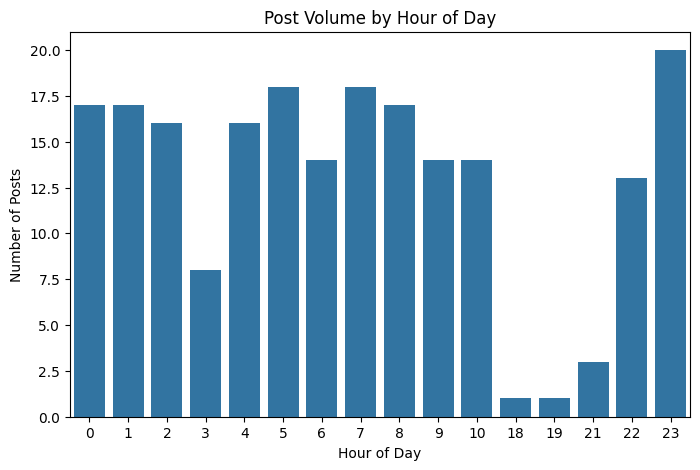

In [ ]:
# Hourly distribution of posts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='hour')
plt.title('Post Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.show()

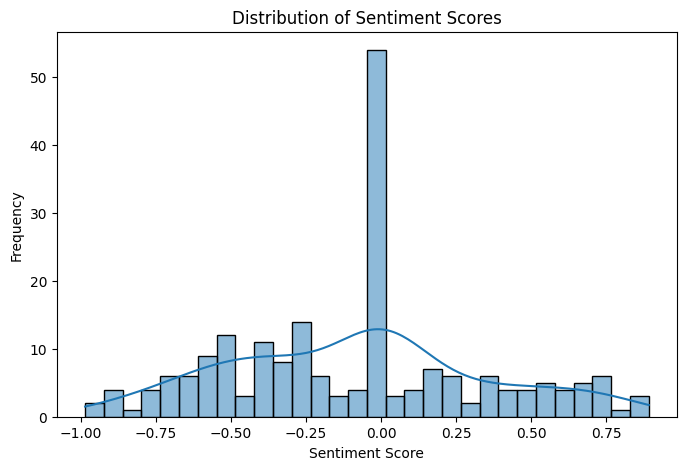

In [ ]:
# Histogram of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

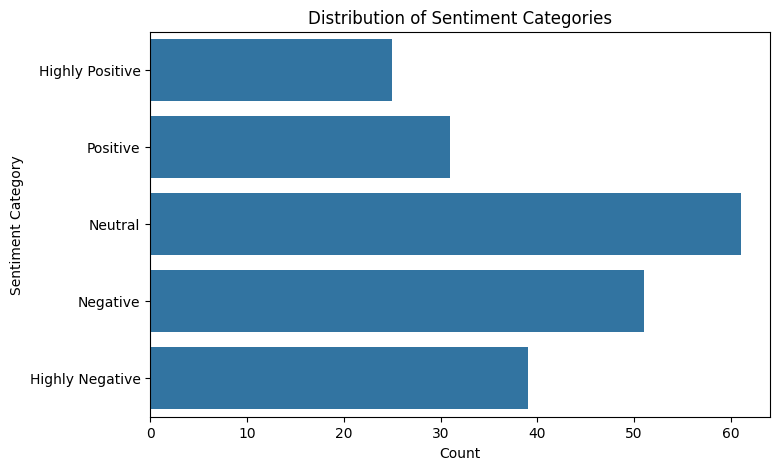

In [ ]:
# Sentiment category statistics chart
category = [
    'Highly Positive',
    'Positive',
    'Neutral',
    'Negative',
    'Highly Negative'
]
def categorize_sentiment(score):
    sentiment = ""
    if score > 0.5:
        sentiment = category[0]
    elif score > 0.1:
        sentiment = category[1]
    elif score > -0.1:
        sentiment = category[2]
    elif score > -0.5:
        sentiment = category[3] 
    else:
        sentiment = category[4]
    return sentiment

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Distribution of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='sentiment_category', order=['Highly Positive', 'Positive', 'Neutral', 'Negative', 'Highly Negative'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Count')
plt.ylabel('Sentiment Category')
plt.show()

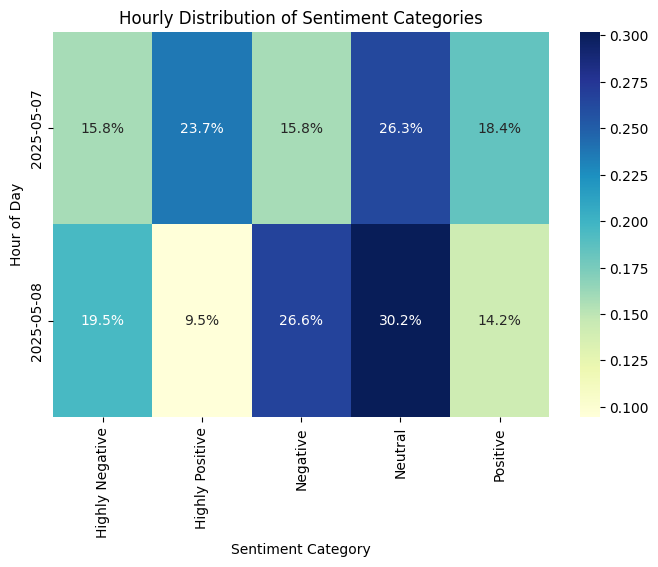

In [ ]:
# Heatmap of sentiment categories over time
hour_sentiment = df.groupby(['date', 'sentiment_category']).size().unstack().fillna(0)
hour_sentiment = hour_sentiment.div(hour_sentiment.sum(axis=1), axis=0)  # 转换为比例

plt.figure(figsize=(8, 5))
sns.heatmap(hour_sentiment, cmap='YlGnBu', annot=True, fmt='.1%')
plt.title('Hourly Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Hour of Day')
plt.show()

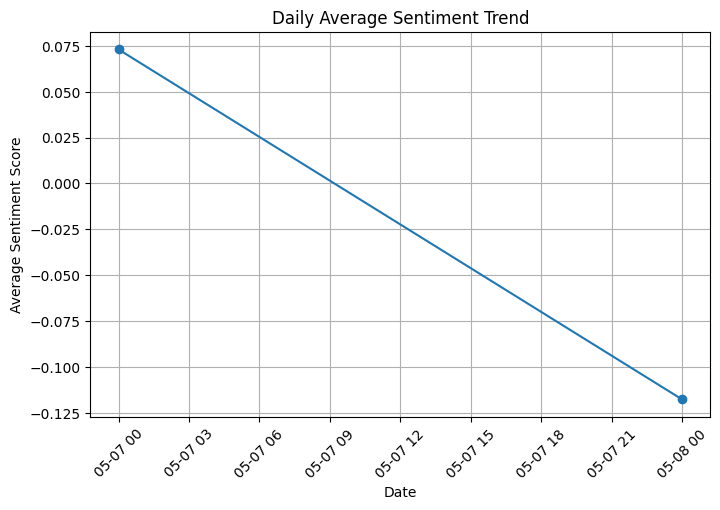

In [ ]:
# Sentiment trends over time
daily_sentiment = df.groupby('date')['sentiment_score'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment_score'], marker='o')
plt.title('Daily Average Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Basic preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    
    return text

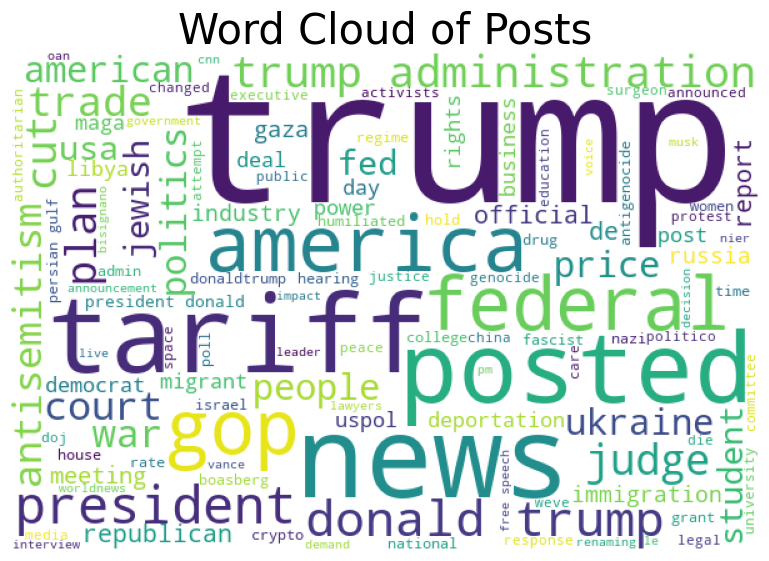

In [ ]:
# Word cloud analysis
all_text = ' '.join(df['content'].dropna().apply(preprocess_text))
stopwords = open("stopwords.txt", encoding='utf-8').read().split('\n')

wordcloud = WordCloud(width=600, height=400, 
                      background_color='white', 
                      stopwords=stopwords, 
                      min_font_size=10,
                      max_words=150).generate(all_text)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Posts', fontsize=30)
plt.show()

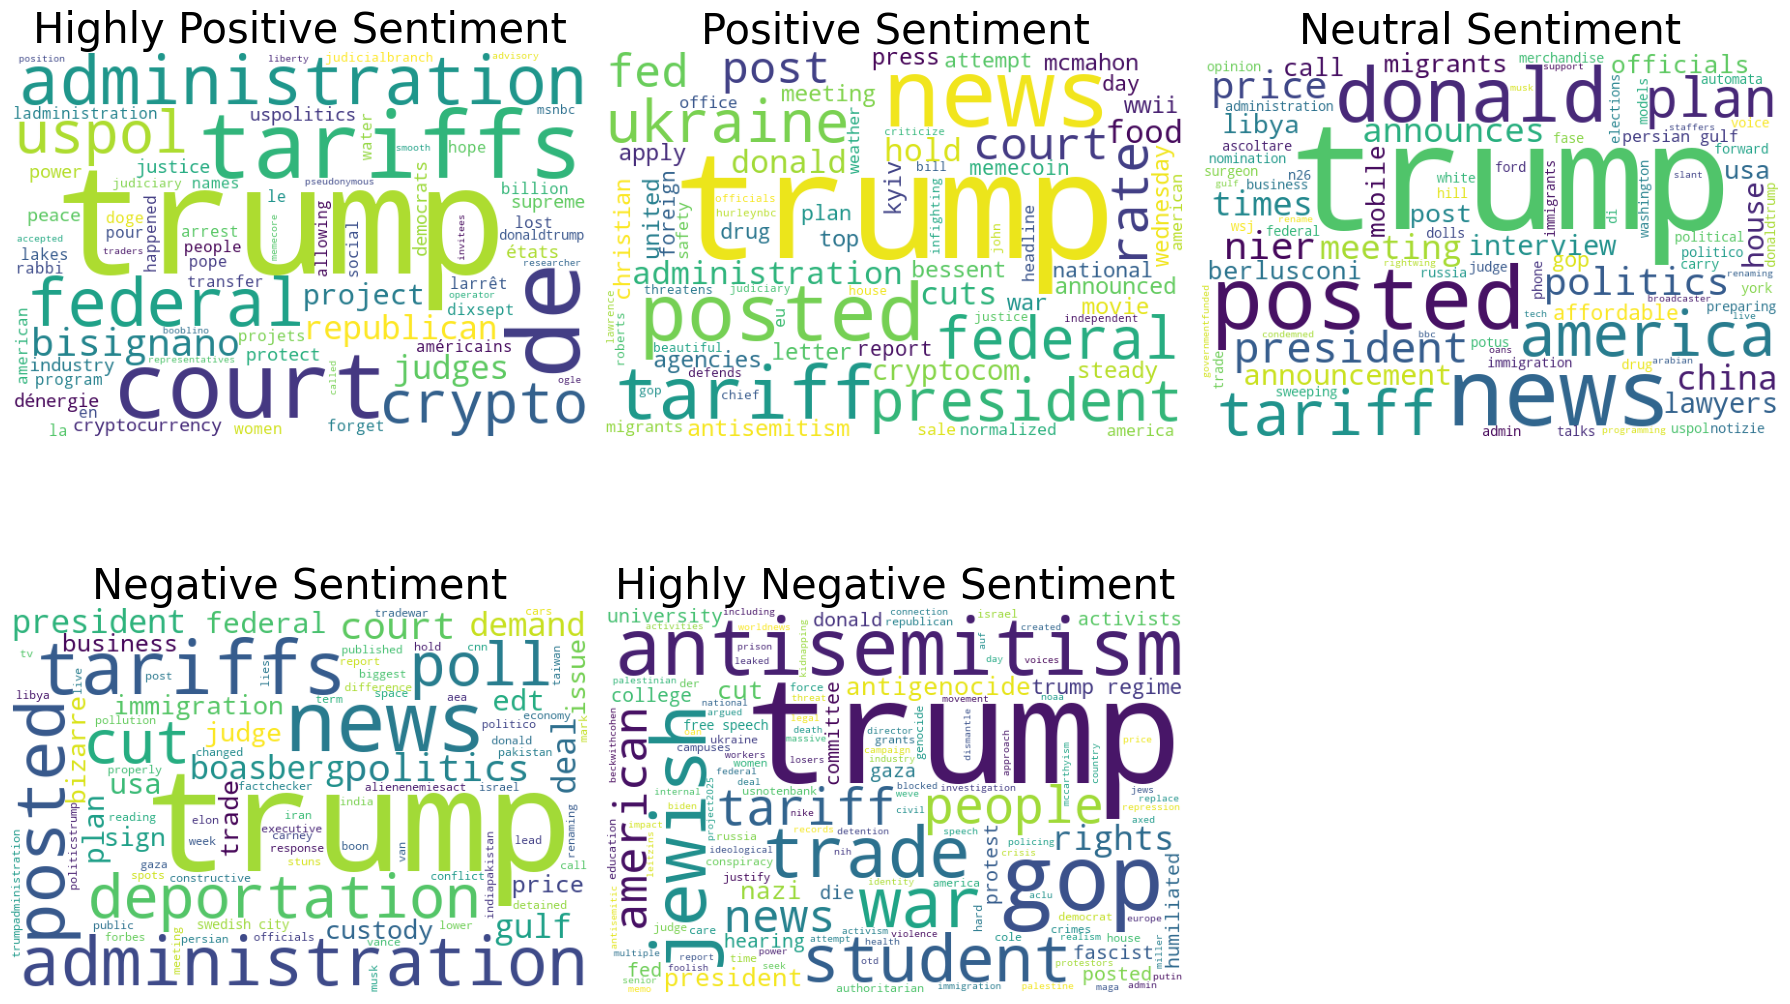

In [ ]:
# Word clouds by sentiment category (2-row, 3-column layout)

plt.figure(figsize=(18, 12))
for i, sentiment in enumerate(category):
    text = ' '.join(df[df['sentiment_category'] == sentiment]['content'].dropna().apply(preprocess_text))
    
    wordcloud = WordCloud(width=600, height=400, 
                          background_color='white', 
                          stopwords=stopwords, 
                          min_font_size=10,
                          max_words=150).generate(text)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'{sentiment} Sentiment', fontsize=30)

plt.tight_layout()
plt.show()